# Script for baseline OLS of WASO

## Imports

In [3]:
##Generic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
##Script specific imports for feature encoding

from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

In [1]:
file = r'/Users/anand/Documents/Sleep/WSC - variable cross-check_v1.xlsx'
data = r'/Users/anand/Documents/Sleep/wsc-dataset-0.2.0.csv'

In [56]:
df = pd.read_excel(file)
data_df = pd.read_csv(data)

In [7]:
pd.set_option('display.max_columns', None)
data_df.head()

,wsc_id,wsc_vst,vst_year,sex,age,race,education_survey1,creatinine,glucose,hdl,ldl,total_cholesterol,triglycerides,uric_acid,heightcm,weightkg,bmi,headcm,waist_girth1,waist_girth2,hip_girth1,hip_girth2,neck_girth1,neck_girth2,sit_sys1,sit_dia1,sit_sys2,sit_dia2,arm_left1,arm_left2,arm_right1,arm_right2,ankle_left1,ankle_left2,ankle_right1,ankle_right2,p_eval_sleep,a_eval_slept,a_eval_hour,a_eval_sleep,sit_sys_repeat,sit_dia_repeat,arm_left_repeat,arm_right_repeat,ankle_left_repeat,ankle_right_repeat,sit_sys_repeat2,sit_dia_repeat2,arm_left_repeat2,arm_right_repeat2,ankle_left_repeat2,ankle_right_repeat2,hipgirthm,neckgirthm,waistgirthm,waisthip,sitsysm,sitdiam,ess,ep1,ep2,ep3,ep4,ep5,ep6,ep7,ep8,zung_score,zung_index,zung1_scored,zung2_scored,zung3_scored,zung4_scored,zung5_scored,zung6_scored,zung7_scored,zung8_scored,zung9_scored,zung10_scored,zung11_scored,zung12_scored,zung13_scored,zung14_scored,zung15_scored,zung16_scored,zung17_scored,zung18_scored,zung19_scored,zung20_scored,state,trait,cans_cola,cups_coffee,caffeine,beer_week,wine_week,hard_week,nondrinker,alcohol_wk,smoke,smoke_curr,smoker,bowls_day,packs_week,cigars_day,smoke_quit,smoke_years,pack_years,eval_general,eval_life,eval_health,tso,workday,weekend,totsleep,naps,totsleepnap,sleepiness,ps_diff,ps_backsleep,ps_wakerepeat,ps_tooearly,ps_notrested,ps_wakeup,ps_nightmare,ps_eds,anyinsomnia,ninsomnia,ninsomniadays,snore_freq,snore_vol,choke_freq,apnea_freq,awake_freq,nasal_cong_today,nasal_cong_tonight,nasal_cong_none,coronary_ynd,coronary_year,angina_ynd,angina_year,atheroscl_ynd,atheroscl_year,arrhythmia_ynd,arrhythmia_year,heartattack_ynd,heartattack_year,congestivehf_ynd,congestivehf_year,coronarybypass_ynd,any_cvd,hypertension_ynd,hypertension_year,stroke_ynd,stroke_year,diabetes_ynd,diabetes_year,asthma_ynd,asthma_year,thyroid_ynd,thyroid_year,thyroid_problem,arthritis_ynd,arthritis_year,emphysema_ynd,emphysema_year,apnea,apnea_year,apnea_need,apnea_treated,apnea_treatment1,apnea_treatment2,apnea_treatment3,apnea_treatment_year,apnea_treatment_help,comp_nights_wk,comp_hrnight,angioplasty_ynd,pacemaker_ynd,coronary_artery_stent_ynd,other_heart_surg,other_heart_surg2,ho_score,reproductive_surg,reproductive_surg_type,reproductive_surg_year,menopausal_status,time_since_last_period,hormone_therapy,num_pregnancies,asthma_med,asthma_rescue_med,asthma_control_med,cholesterol_med,depression_med,dep_maoi_med,dep_ssri_med,dep_tca_med,htn_med,htn_acei_med,htn_alpha_med,htn_arb_med,htn_beta_med,htn_diuretic_med,narcotics_med,decongestants_med,antihistamines_med,anxiety_med,diabetes_med,estrogen_med,androgen_med,progesterone_med,sedative_med,stimulants_med,thyroid_med,psg_source,psg_cpap,psg_oxygen,tst,tst_rem,tst_nrem,ahi,remahi,nremahi,pcttststagen1,pcttststagen2,pcttststage12,pcttststage34,pcttstrem,avgo2sattst,minsao2tst,ptstl90,sleep_latency,rem_latency,se,waso,mean_desat_perc,mean_desat_dur
0,10119,1,2003,M,52,5,6.0,0.9,89.0,52.0,149.0,228.0,137.0,7.2,176,85.5,27.6,59.5,92.0,92.0,97.0,96.5,39.5,39.5,112.0,78.0,116.0,80.0,110.0,112.0,106.0,110.0,120.0,120.0,124.0,126.0,3.0,2.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.8,39.5,92.0,0.9509,114.0,79.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,30.00,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,24.0,1,3,4,2.0,0.0,0.0,N,2,N,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,1,1,1,4.0,7.5,8.0,7.6,0.0,7.6,N,0,1,1,1,0.0,0,0,0,0,0,3,2.0,1,1,1,1,NaN,NaN,Y,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,0,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,NaN,N,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gamma,NaN,NaN,368.0,38.5,329.5,0.5,1.6,0.4,6.3,77.9,84.2,5.4,10.5,96.7,93.8,0.0,7.0,87.0,83.0,65.0,3.42,27.4
1,10119,2,2008,M,58,5,6.0,0.8,95.0,36.0,144.0,217.0,186.0,6.5,178,90.5,28.6,61.0,101.0,101.0,101.0,101.0,39.0,39.0,118.0,84.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,7.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
deleted = df[df['Proposed Removal'] == 'R']
deleted_cols = deleted.iloc[:, 0]
#deleted_cols.to_list()

In [9]:
data_df = data_df.drop(deleted_cols.to_list(), axis=1)

In [10]:
## sort out nasal_cong_none
data_df.nasal_cong_none.replace({np.nan:0,'Y':1}, inplace=True)

In [88]:
data_df.head()

,wsc_id,wsc_vst,vst_year,sex,age,race,education_survey1,creatinine,glucose,hdl,ldl,total_cholesterol,triglycerides,uric_acid,heightcm,weightkg,bmi,headcm,waist_girth1,waist_girth2,hip_girth1,hip_girth2,neck_girth1,neck_girth2,sit_sys1,sit_dia1,sit_sys2,sit_dia2,arm_left1,arm_left2,arm_right1,arm_right2,ankle_left1,ankle_left2,ankle_right1,ankle_right2,p_eval_sleep,a_eval_slept,a_eval_hour,a_eval_sleep,sit_sys_repeat,sit_dia_repeat,arm_left_repeat,arm_right_repeat,ankle_left_repeat,ankle_right_repeat,sit_sys_repeat2,sit_dia_repeat2,arm_left_repeat2,arm_right_repeat2,ankle_left_repeat2,ankle_right_repeat2,hipgirthm,neckgirthm,waistgirthm,waisthip,sitsysm,sitdiam,ess,ep1,ep2,ep3,ep4,ep5,ep6,ep7,ep8,zung_score,zung_index,zung1_scored,zung2_scored,zung3_scored,zung4_scored,zung5_scored,zung6_scored,zung7_scored,zung8_scored,zung9_scored,zung10_scored,zung11_scored,zung12_scored,zung13_scored,zung14_scored,zung15_scored,zung16_scored,zung17_scored,zung18_scored,zung19_scored,zung20_scored,state,trait,cans_cola,cups_coffee,caffeine,beer_week,wine_week,hard_week,nondrinker,alcohol_wk,smoke,smoke_curr,smoker,bowls_day,packs_week,cigars_day,smoke_quit,smoke_years,pack_years,eval_general,eval_life,eval_health,tso,workday,weekend,totsleep,naps,totsleepnap,sleepiness,ps_diff,ps_backsleep,ps_wakerepeat,ps_tooearly,ps_notrested,ps_wakeup,ps_nightmare,ps_eds,anyinsomnia,ninsomnia,ninsomniadays,snore_freq,snore_vol,choke_freq,apnea_freq,awake_freq,nasal_cong_today,nasal_cong_tonight,nasal_cong_none,coronary_ynd,coronary_year,angina_ynd,angina_year,atheroscl_ynd,atheroscl_year,arrhythmia_ynd,arrhythmia_year,heartattack_ynd,heartattack_year,congestivehf_ynd,congestivehf_year,coronarybypass_ynd,any_cvd,hypertension_ynd,hypertension_year,stroke_ynd,stroke_year,diabetes_ynd,diabetes_year,asthma_ynd,asthma_year,thyroid_ynd,thyroid_year,thyroid_problem,arthritis_ynd,arthritis_year,emphysema_ynd,emphysema_year,apnea,apnea_year,apnea_need,apnea_treated,apnea_treatment1,apnea_treatment2,apnea_treatment3,apnea_treatment_year,apnea_treatment_help,comp_nights_wk,comp_hrnight,angioplasty_ynd,pacemaker_ynd,coronary_artery_stent_ynd,other_heart_surg,other_heart_surg2,ho_score,reproductive_surg,reproductive_surg_type,reproductive_surg_year,menopausal_status,time_since_last_period,hormone_therapy,num_pregnancies,asthma_med,asthma_rescue_med,asthma_control_med,cholesterol_med,depression_med,dep_maoi_med,dep_ssri_med,dep_tca_med,htn_med,htn_acei_med,htn_alpha_med,htn_arb_med,htn_beta_med,htn_diuretic_med,narcotics_med,decongestants_med,antihistamines_med,anxiety_med,diabetes_med,estrogen_med,androgen_med,progesterone_med,sedative_med,stimulants_med,thyroid_med,psg_source,psg_cpap,psg_oxygen,tst,tst_rem,tst_nrem,ahi,remahi,nremahi,pcttststagen1,pcttststagen2,pcttststage12,pcttststage34,pcttstrem,avgo2sattst,minsao2tst,ptstl90,sleep_latency,rem_latency,se,waso,mean_desat_perc,mean_desat_dur
0,10119,1,2003,M,52,5,6.0,0.9,89.0,52.0,149.0,228.0,137.0,7.2,176,85.5,27.6,59.5,92.0,92.0,97.0,96.5,39.5,39.5,112.0,78.0,116.0,80.0,110.0,112.0,106.0,110.0,120.0,120.0,124.0,126.0,3.0,2.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.8,39.5,92.0,0.9509,114.0,79.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,30.00,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,24.0,1,3,4,2.0,0.0,0.0,N,2,N,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,1,1,1,4.0,7.5,8.0,7.6,0.0,7.6,N,0,1,1,1,0.0,0,0,0,0,0,3,2.0,1,1,1,1,NaN,NaN,Y,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,0,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,NaN,N,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gamma,NaN,NaN,368.0,38.5,329.5,0.5,1.6,0.4,6.3,77.9,84.2,5.4,10.5,96.7,93.8,0.0,7.0,87.0,83.0,65.0,3.42,27.4
1,10119,2,2008,M,58,5,6.0,0.8,95.0,36.0,144.0,217.0,186.0,6.5,178,90.5,28.6,61.0,101.0,101.0,101.0,101.0,39.0,39.0,118.0,84.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,7.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [87]:
data_df[['waso', 'se', 'tst']]

#tst < 7 or > 9 = bad
#se< 85 is bad, < 75 very bad >85 is good > 95 bad
#waso < 30 is good > 30 is bad

,waso,se,tst
0,65.0,83.0,368.0
1,27.0,93.3,444.0
2,44.0,87.1,419.0
3,62.5,85.4,398.5
4,58.0,83.7,384.0
...,...,...,...
2565,48.5,88.2,393.5
2566,39.0,86.2,406.4
2567,45.0,90.1,450.0
2568,99.0,73.6,297.5


<AxesSubplot:>

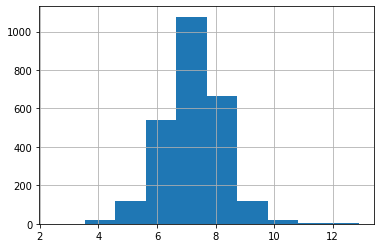

In [86]:
## added 
scorevars = data_df[['ps_diff','ps_backsleep','ps_wakerepeat','totsleep']]
scorevars.totsleep.hist()

In [85]:
np.corrcoef(scorevars.ps_backsleep, scorevars.ps_wakerepeat)

array([[1.        , 0.38403318],
       [0.38403318, 1.        ]])

In [76]:
[scorevars.totsleep < 7] and [scorevars.totsleep > 9]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2565    False
 2566    False
 2567    False
 2568    False
 2569    False
 Name: totsleep, Length: 2570, dtype: bool]

## Balancing

In [11]:
##BALANCING

# balance_cutoff = 0.975
# imbalanced_classes = []
# for col in data_df.columns:
#     _ = data_df.columns.get_loc(col)
#     if data_df.iloc[:, _].value_counts(normalize=True).head(1).values > balance_cutoff:
#         imbalanced_classes.append((col, data_df.iloc[:, _].value_counts(normalize=True).head(1).values.astype(float)))

In [12]:
# imbalanced_classes

[('atheroscl_ynd', array([0.9758661])),
 ('congestivehf_ynd', array([0.98871595])),
 ('stroke_ynd', array([0.97743191])),
 ('emphysema_ynd', array([0.97898833])),
 ('pacemaker_ynd', array([0.99105058])),
 ('coronary_artery_stent_ynd', array([0.9766537])),
 ('dep_maoi_med', array([0.99922179])),
 ('dep_tca_med', array([0.9766537])),
 ('narcotics_med', array([0.9766537])),
 ('androgen_med', array([0.99688716])),
 ('stimulants_med', array([0.9848249])),
 ('psg_oxygen', array([1.]))]

In [13]:
imbalanced_list = []
for classes in imbalanced_classes:
    imbalanced_list.append(classes[0])

In [14]:
imbalanced_list

['atheroscl_ynd',
 'congestivehf_ynd',
 'stroke_ynd',
 'emphysema_ynd',
 'pacemaker_ynd',
 'coronary_artery_stent_ynd',
 'dep_maoi_med',
 'dep_tca_med',
 'narcotics_med',
 'androgen_med',
 'stimulants_med',
 'psg_oxygen']

## Removal of serial observations

In [15]:
##DUPLICATES

data_df.drop(imbalanced_list, axis=1, inplace=True)
data_df.drop_duplicates('wsc_id', inplace=True)
data_df.set_index('wsc_id', inplace=True)
#data_df.fillna(0, inplace=True)

## Feature encoding

In [16]:
objlist = []

for n in data_df.dtypes[data_df.dtypes == 'object'].index:
    objlist.append(n)

In [17]:
## Binariser -  should work if nans are present or not...

for i,v in enumerate(objlist):
    
    ##columns with 2 variables eg. [N,Y] or [M,F]
    
    if len(data_df[v].unique()) == 2:
        ##print(data_df[v].unique(),v)
        data_df[objlist[i]].replace\
        ({data_df[objlist[i]].unique()[0]:0,data_df[objlist[i]].unique()[1]:1}, inplace=True)
        
    #### ALL columns with 3 variables - which appear like [N,Y,nan]
    if len(data_df[v].unique()) == 3:
        ##print(data_df[v].unique(),v)
        data_df[objlist[i]].replace\
        ({'N':0,'Y':1}, inplace=True)

In [18]:
#### ONE HOT ENCODER SCRIPT

ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)


## Only variables which need OHE
X1 = data_df[['thyroid_problem']]
X2 = data_df[['hormone_therapy']]

##fit transform, extract column names, make dataframe with column names, drop nan row

X1t = ohe.fit_transform(X1)
colnames = list(ohe.get_feature_names())
X1df = pd.DataFrame(X1t, columns = colnames)
X1df.drop(columns = 'x0_nan', inplace=True)
X1df.index = data_df.index

X2t = ohe.fit_transform(X2)
colnames = list(ohe.get_feature_names())
X2df = pd.DataFrame(X2t, columns = colnames)
X2df.drop(columns = 'x0_nan', inplace=True)
X2df.index = data_df.index

frames = [data_df, X1df, X2df]
data_df = pd.concat(frames, axis = 1)

##drop original row names

data_df.drop(columns = ['thyroid_problem','hormone_therapy'], inplace=True)

In [19]:
data_df.head()

,wsc_vst,sex,age,race,education_survey1,creatinine,glucose,hdl,ldl,total_cholesterol,triglycerides,uric_acid,heightcm,weightkg,bmi,headcm,waist_girth1,waist_girth2,hip_girth1,hip_girth2,neck_girth1,neck_girth2,sit_sys1,sit_dia1,sit_sys2,sit_dia2,p_eval_sleep,a_eval_slept,a_eval_hour,a_eval_sleep,hipgirthm,neckgirthm,waistgirthm,waisthip,sitsysm,sitdiam,ess,zung_score,zung_index,state,trait,cans_cola,cups_coffee,caffeine,beer_week,wine_week,hard_week,nondrinker,alcohol_wk,smoke,smoke_curr,bowls_day,packs_week,cigars_day,smoke_quit,smoke_years,pack_years,eval_general,eval_life,eval_health,tso,workday,weekend,totsleep,naps,sleepiness,ps_eds,anyinsomnia,snore_freq,snore_vol,choke_freq,apnea_freq,awake_freq,nasal_cong_none,coronary_ynd,angina_ynd,arrhythmia_ynd,heartattack_ynd,coronarybypass_ynd,any_cvd,hypertension_ynd,diabetes_ynd,asthma_ynd,thyroid_ynd,arthritis_ynd,apnea,angioplasty_ynd,ho_score,menopausal_status,num_pregnancies,asthma_med,asthma_rescue_med,asthma_control_med,cholesterol_med,depression_med,dep_ssri_med,htn_med,htn_acei_med,htn_alpha_med,htn_arb_med,htn_beta_med,htn_diuretic_med,decongestants_med,antihistamines_med,anxiety_med,diabetes_med,estrogen_med,progesterone_med,sedative_med,thyroid_med,psg_cpap,tst,tst_rem,tst_nrem,ahi,minsao2tst,ptstl90,se,waso,x0_Hyperthyroid,x0_Hypothyroid,x0_Nodule,x0_Thyroid Cancer,x0_Unknown,x0_C,x0_N,x0_P
wsc_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10119,1,0,52,5,6.0,0.9,89.0,52.0,149.0,228.0,137.0,7.2,176,85.5,27.6,59.5,92.0,92.0,97.0,96.5,39.5,39.5,112.0,78.0,116.0,80.0,3.0,2.0,7.0,3.0,96.8,39.5,92.0,0.9509,114.0,79.0,2.0,24.0,30.00,20.0,24.0,1,3,4,2.0,0.0,0.0,0.0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,1,1,4.0,7.5,8.0,7.6,0.0,0.0,0,0,2.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,69,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,368.0,38.5,329.5,0.5,93.8,0.0,83.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10191,1,1,50,5,5.0,0.8,96.0,77.0,122.0,222.0,117.0,3.4,170,73.0,25.3,54.9,81.0,81.0,107.0,107.0,31.5,31.5,132.0,84.0,132.0,84.0,2.0,2.0,7.5,3.0,107.0,31.5,81.0,0.7570,132.0,84.0,7.0,31.0,38.75,27.4,24.0,4,0,4,1.0,0.0,0.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1,2,2,13.0,6.5,10.5,7.6,0.0,0.0,1,0,1.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,NaN,419.0,129.0,290.0,0.0,94.2,0.0,87.1,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10198,1,1,57,5,4.0,0.9,103.0,48.0,146.0,211.0,85.0,5.9,157,115.5,46.9,56.7,143.0,143.0,147.5,147.5,39.5,39.5,142.0,88.0,146.0,92.0,3.0,2.0,4.0,3.0,147.5,39.5,143.0,0.9695,144.0,90.0,6.0,30.0,37.50,25.3,28.0,0,0,0,NaN,NaN,NaN,1.0,0,1,0.0,NaN,11.0,NaN,1986.0,30.0,47.142857,1,1,3,13.0,6.5,9.0,7.2,1.0,0.0,1,0,9.0,9,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,67,4.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1.0,384.0,69.5,314.5,7.3,87.2,0.7,83.7,58.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10226,1,0,55,5,4.0,1.4,131.0,39.0,107.0,173.0,135.0,8.5,173,79.2,26.5,56.8,98.0,98.0,99.5,99.5,39.5,39.0,128.0,76.0,132.0,78.0,5.0,2.0,5.0,3.0,99.5,39.3,98.0,0.9849,130.0,77.0,0.0,34.0,42.50,37.9,36.0,0,6,6,42.0,0.0,0.0,NaN,42,1,1.0,NaN,13.0,NaN,NaN,42.0,78.000000,1,3,3,5.0,7.0,9.0,7.6,0.0,0.0,0,0,5.0,4,2,9,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,57,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,328.0,46.5,281.5,18.1,89.8,0.0,71.4,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10241,1,1,51,1,4.0,0.9,102.0,37.0,135.0,228.0,281.0,7.1,171,100.6,34.4,57.7,113.0,113.0,111.5,112.0,42.0,42.0,140.0,88.0,142.0,90.0,7.0,3.0,4.5,4.0,111.8,42.0,113.0,1.0112,141.0,89.0,7.0,31.0,38.75,21.1,25.0,1,0,1,NaN,NaN,NaN,1.0,0,1,0.0,NaN,2.0,NaN,1974.0,4.0,1.142857,2,1,5,4.0,5.5,6.5,5.8,8.0,1.0,2,0,4.0,2,9,9,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,62,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,350.5,47.0,303.5,18.3,84.8,2.0,81.6,66.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Target Selection

In [ ]:
## First targets = waso, tst, se, tso

In [89]:
#### Keep main target (WAS0)
y = data_df.totsleep
y.shape

(2570,)

In [90]:
#### Other confounding targets to remove including target

targs = ['tst', 'tst_rem', 'tst_nrem', 'tso', 'totsleep', 'ess','p_eval_sleep', 'a_eval_slept', 'a_eval_hour',
       'a_eval_sleep', 'ps_eds','se', 'waso','sleepiness', 'workday', 'weekend']

In [91]:
## Drop confounding targets

X = data_df.drop(columns = targs)
X.shape

(2570, 222)

In [92]:
#### Scaling numerical features - categorical features and targets removed from this listt

numeric_features = ['creatinine', 'glucose', 'hdl', 'ldl','total_cholesterol', 'triglycerides', 'uric_acid', 'weightkg', 'bmi',
       'headcm', 'waist_girth1', 'waist_girth2', 'hip_girth1', 'hip_girth2',
       'neck_girth1', 'neck_girth2', 'sit_sys1', 'sit_dia1', 'sit_sys2',
       'sit_dia2', 'hipgirthm', 'neckgirthm', 'waistgirthm', 'waisthip',
       'sitsysm', 'sitdiam', 'zung_score', 'zung_index', 'state',
       'trait', 'beer_week', 'wine_week', 'hard_week', 'bowls_day', 'packs_week', 'cigars_day',
       'smoke_years', 'pack_years',
       'naps', 'snore_freq',
       'num_pregnancies', 'psg_cpap', 'ahi',
       'minsao2tst', 'ptstl90', 'age', 'heightcm', 'cans_cola', 'cups_coffee',
       'caffeine', 'alcohol_wk','eval_general', 'eval_life','eval_health', 
       'snore_vol', 'choke_freq',
       'apnea_freq', 'awake_freq', 'ho_score']

In [93]:
len(categorical_features)

52

In [94]:
len(numeric_features)

59

In [167]:
#### Ordinal variables to be aware of - should not be scaled
ords = ['menopausal_status']


## Column transforming

In [95]:
categoric = data_df.drop(columns = targs)
categoric.drop(columns = numeric_features, inplace=True)
#categoric.drop(columns =['waso', 'wsc_vst'], inplace=True)

In [96]:
categorical_features = categoric.columns

In [97]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

In [98]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())])

In [99]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),\
        ('cat', categorical_transformer, categorical_features)])

In [100]:
prepipe = Pipeline(steps=[('preprocessor', preprocessor)])

In [101]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),('regression', LinearRegression())])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42)

In [103]:
cv_results = cross_validate(pipe, X_train, y_train, cv=10, scoring=('r2','neg_mean_absolute_error'))
sorted(cv_results.keys())

/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **k

/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **k

/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **k

['fit_time', 'score_time', 'test_neg_mean_absolute_error', 'test_r2']

In [104]:
cv_results['test_neg_mean_absolute_error'].mean()

nan

In [105]:
cv_results['test_r2'].mean()

nan

In [106]:
y_train.min(), y_train.max()

(2.5, 12.9)

# VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [107]:
Xt = prepipe.fit_transform(X_train)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'F'

In [41]:
X_train.columns

Index(['wsc_vst', 'sex', 'age', 'race', 'education_survey1', 'creatinine',
       'glucose', 'hdl', 'ldl', 'total_cholesterol',
       ...
       'minsao2tst', 'ptstl90', 'x0_Hyperthyroid', 'x0_Hypothyroid',
       'x0_Nodule', 'x0_Thyroid Cancer', 'x0_Unknown', 'x0_C', 'x0_N', 'x0_P'],
      dtype='object', length=111)

In [108]:
X_train.shape

(2184, 222)

In [109]:
Xt.shape

(954, 111)

In [44]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [110]:
vifs = calc_vif(X_train)

TypeError: '>=' not supported between instances of 'str' and 'float'

In [51]:
vifs.sort_values(by='VIF', ascending=False, inplace=True)

In [52]:
vifs.head(30)

,variables,VIF
107,x0_Unknown,inf
26,hipgirthm,inf
49,smoke_quit,inf
48,cigars_day,inf
47,packs_week,inf
103,x0_Hyperthyroid,inf
104,x0_Hypothyroid,inf
105,x0_Nodule,inf
106,x0_Thyroid Cancer,inf
27,neckgirthm,inf


# Statsmodels OLS

In [55]:
import statsmodels.api as sm

In [48]:
Xt.shape

(954, 111)

In [49]:
Xt1 = pd.DataFrame(Xt, columns = X_train.columns)

In [356]:
#Xt1.insert(loc=0, column='constant', value=1)

In [581]:
DRvif

['smoke_years',
 'x0_Thyroid Cancer',
 'pack_years',
 'neckgirthm',
 'num_pregnancies',
 'x0_Unknown',
 'hipgirthm',
 'x0_Hyperthyroid',
 'x0_Hypothyroid',
 'x0_Nodule',
 'smoke_quit',
 'neck_girth2',
 'sit_sys1',
 'neck_girth1',
 'triglycerides',
 'headcm',
 'heightcm',
 'bmi',
 'uric_acid',
 'weightkg',
 'sit_sys2',
 'sit_dia2',
 'hip_girth1',
 'ldl',
 'waist_girth1',
 'hdl',
 'eval_general',
 'sit_dia1',
 'hip_girth2',
 'waist_girth2',
 'sitsysm',
 'education_survey1',
 'race',
 'cigars_day',
 'sitdiam',
 'zung_score',
 'coronary_ynd',
 'apnea_freq',
 'depression_med',
 'cups_coffee',
 'x0_N',
 'ptstl90',
 'x0_C',
 'htn_med',
 'creatinine',
 'age',
 'psg_cpap',
 'ho_score',
 'angina_ynd',
 'htn_beta_med',
 'thyroid_med',
 'hypertension_ynd',
 'x0_P',
 'state',
 'cans_cola',
 'waisthip',
 'apnea',
 'htn_alpha_med',
 'angioplasty_ynd',
 'htn_arb_med',
 'dep_ssri_med',
 'arthritis_ynd',
 'total_cholesterol',
 'packs_week']

In [700]:
Xt1.drop(columns = corvarlist, inplace=True)

In [53]:
yt = y_train.reset_index(drop=True)

In [54]:
model = sm.OLS(yt, Xt1)

NameError: name 'sm' is not defined

In [703]:
result = model.fit()

In [704]:
pvals = pd.DataFrame(result.pvalues).sort_values(by = 0, ascending=True)

In [705]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   waso   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.276
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           4.26e-07
Time:                        22:00:32   Log-Likelihood:                -4534.3
No. Observations:                 898   AIC:                             9189.
Df Residuals:                     838   BIC:                             9477.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sex                    0.2974      1.672      0.178      0.859      -2.984       3.578
age                   -0.2636      1.819     -0.145      0.885      -3.833       3.306
race                  -1.0227      3.479     -0.294      0.769      -7.852       5.806
education_survey1      2.7268      3.510      0.777      0.437      -4.162       9.616
glucose               -0.1690      1.668     -0.101      0.919      -3.444       3.106
hdl                    3.6829      4.607      0.799      0.424      -5.359      12.725
ldl                   -0.1557      4.717     -0.033      0.974      -9.415       9.103
triglycerides        -43.5888     51.070     -0.854      0.394    -143.829      56.651
uric_acid             44.8227     51.167      0.876      0.381     -55.608     145.254
heightcm              36.5604     25.926      1.410      0.159     -14.328      87.448
weightkg             -39.2163     25.540     -1.535      0.125     -89.346      10.914
headcm                -1.8624      2.840     -0.656      0.512      -7.436       3.711
hipgirthm             -0.1060      0.975     -0.109      0.913      -2.020       1.808
neckgirthm            -0.1060      0.975     -0.109      0.913      -2.020       1.808
waistgirthm            1.2768      1.674      0.763      0.446      -2.010       4.563
sitsysm                3.6001      2.407      1.496      0.135      -1.124       8.324
sitdiam                2.2858      1.742      1.312      0.190      -1.133       5.704
zung_index            -1.7378      1.434     -1.212      0.226      -4.552       1.076
state                  0.2467      1.407      0.175      0.861      -2.515       3.008
trait                  0.2580      1.415      0.182      0.855      -2.519       3.036
cans_cola              1.7884      1.528      1.170      0.242      -1.212       4.788
caffeine               3.4179      1.415      2.415      0.016       0.640       6.196
alcohol_wk             1.2756      1.356      0.941      0.347      -1.385       3.936
smoke_years           -1.3214      1.413     -0.935      0.350      -4.095       1.452
eval_general          -3.1042      2.617     -1.186      0.236      -8.240       2.032
eval_life              1.7771      1.516      1.172      0.241      -1.198       4.752
eval_health           -1.5614      1.636     -0.954      0.340      -4.772       1.650
workday                0.8445      1.773      0.476      0.634      -2.635       4.324
weekend                2.4511      1.460      1.679      0.093      -0.414       5.316
naps                   0.5515      1.685      0.327      0.743      -2.755       3.858
anyinsomnia            1.2294      1.670      0.736      0.462      -2.049       4.508
snore_freq            -2.2429      1.462     -1.534      0.125      -5.112       0.626
snore_vol              2.2679      1.4

In [709]:
lowsig = pvals[pvals<0.05].head(40)
#lowsig = lowsig.reindex(level=-10)
lowsig

,0
choke_freq,9.009187e-12
x0_N,2.272146e-04
arthritis_ynd,2.574626e-03
x0_C,5.947259e-03
caffeine,1.595334e-02
x0_Unknown,NaN
weekend,NaN
snore_vol,NaN
weightkg,NaN
snore_freq,NaN


In [671]:
lin = LinearRegression()

In [389]:
lin.fit(Xt1,yt)

LinearRegression()

In [407]:
Xtest1.insert(loc=0, column='constant', value=1)

In [408]:
Xtest1.shape

(225, 114)

In [409]:
ypred = lin.predict(Xtest1)

In [412]:
r2_score(ytest, ypred)

0.15985970132440386

In [395]:
Xtest = prepipe.fit_transform(X_test)
Xtest1 = pd.DataFrame(Xtest, columns = X_test.columns)

In [410]:
from sklearn.metrics import mean_squared_error, r2_score

In [401]:
ytest.shape

(225,)

In [398]:
ytest = y_test.reset_index(drop=True)

In [396]:
Xtest1

,wsc_vst,sex,age,race,education_survey1,creatinine,glucose,hdl,ldl,total_cholesterol,...,minsao2tst,ptstl90,x0_Hyperthyroid,x0_Hypothyroid,x0_Nodule,x0_Thyroid Cancer,x0_Unknown,x0_C,x0_N,x0_P
0,1.341034,0.054003,0.059422,-0.431069,-0.389992,-0.116512,0.397010,1.416740,2.555649,-0.621804,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.400413,-0.322723,1.730909,0.488504,0.849095,-0.546480,-0.647312,-0.306977,0.599940,-1.297460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.470311,-0.322723,-1.194193,0.000000,-0.812408,1.708230,1.310792,-0.376857,-0.803069,-0.171366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.400413,0.273760,-0.149514,0.422820,0.764612,0.837807,0.397010,0.620103,0.982579,-0.441629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.470311,-0.322723,-0.497740,-0.102650,-0.474475,-0.378687,-0.843123,-0.190509,-0.533805,0.053852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.400413,-0.291329,-0.428095,-0.989381,-1.319308,-0.619889,-0.777853,-0.120629,-0.278712,0.504290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.470311,-0.228541,-0.079868,1.046816,0.961740,0.114203,1.376062,0.927577,1.336874,-0.621804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
222,-1.271137,-0.354116,2.218426,-0.923698,-0.221026,-0.672324,-1.691635,-0.959194,-0.888100,-0.847023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223,2.647120,-0.228541,-1.821000,0.061559,-0.361831,0.575632,0.592821,0.578175,-0.321228,2.306040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Sparse model

In [427]:
sparse = ['sex', 'age', 'x0_Hyperthyroid','x0_Hypothyroid', 'heightcm', 'weightkg', 'neck_girth1', 'zung_score', 'state', 'trait', 'caffeine', 'smoke', 'snore_freq', 'any_cvd', 'asthma_ynd', 'apnea', 'arthritis_ynd', 'neckgirthm' ]

In [429]:
Xs = Xt1[sparse]

In [430]:
yt

0       67.5
1       37.0
2       39.5
3       35.0
4      112.0
       ...  
893    243.0
894    141.5
895     35.0
896     43.5
897     97.5
Name: waso, Length: 898, dtype: float64

In [431]:
Xs

,sex,age,x0_Hyperthyroid,x0_Hypothyroid,heightcm,weightkg,neck_girth1,zung_score,state,trait,caffeine,smoke,snore_freq,any_cvd,asthma_ynd,apnea,arthritis_ynd,neckgirthm
0,0.271868,-0.504414,0.0,0.0,-1.115471,-1.151443,-1.131126,-0.519446,2.570678e-16,-6.000137e-16,-0.022286,-0.255142,-0.374701,1.0,0.0,0.0,0.0,-1.509097
1,-0.157088,-0.096474,0.0,0.0,0.052925,0.052239,0.050707,-0.519446,2.570678e-16,-6.000137e-16,-0.507788,0.111066,-0.374701,1.0,0.0,0.0,0.0,-0.485073
2,-0.586045,-0.776374,0.0,0.0,-0.668732,-0.669970,-0.670761,0.000000,2.570678e-16,-6.000137e-16,0.463217,-0.717720,-0.374701,0.0,1.0,0.0,0.0,-0.631362
3,-0.085596,-0.844364,0.0,0.0,-0.290721,-0.291670,-0.292849,-0.519446,-4.980024e-01,-6.000137e-16,-0.993291,0.727837,0.081855,0.0,1.0,0.0,0.0,-0.192494
4,-0.657537,0.311466,0.0,0.0,-1.252930,-1.254615,-1.254806,0.000000,2.570678e-16,-6.000137e-16,-0.022286,-0.036702,-0.374701,1.0,0.0,0.0,0.0,-0.631362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2.845605,-0.028484,0.0,0.0,0.671487,0.740057,0.703464,0.000000,2.570678e-16,-6.000137e-16,0.948720,-0.550678,-0.374701,0.0,0.0,0.0,0.0,-0.046205
894,-0.621791,1.195336,0.0,0.0,-0.565638,-0.566797,-0.567694,0.506460,2.570678e-16,-6.000137e-16,-0.022286,-0.749844,-0.374701,0.0,0.0,0.0,0.0,-0.631362
895,-0.764776,0.583426,0.0,1.0,-1.115471,-1.117052,-1.117384,-0.519446,8.086280e-02,-6.000137e-16,0.463217,-0.698446,-0.374701,1.0,0.0,0.0,0.0,1.416686
896,-0.300074,-1.048334,0.0,0.0,0.121654,0.121021,0.119418,-0.519446,2.570678e-16,-6.000137e-16,-0.022286,2.764465,0.081855,1.0,0.0,0.0,0.0,0.100084


In [432]:
##Needs a constant inserted

Xs.insert(loc=0, column='constant', value=1)

##Modelling

model = sm.(yt, Xs)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   waso   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.525
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.51e-09
Time:                        15:44:36   Log-Likelihood:                -4561.3
No. Observations:                 898   AIC:                             9161.
Df Residuals:                     879   BIC:                             9252.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant           70.7645      2.379     29.747      0.000      66.096      75.434
sex                 1.5294      1.414      1.082      0.280      -1.245       4.304
age                -1.3375      1.368     -0.977      0.329      -4.023       1.348
x0_Hyperthyroid     0.8253     14.073      0.059      0.953     -26.795      28.446
x0_Hypothyroid      2.7414      5.090      0.539      0.590      -7.249      12.732
heightcm           62.0109    139.606      0.444      0.657    -211.989     336.011
weightkg          -30.6788     26.090     -1.176      0.240     -81.885      20.527
neck_girth1       -34.3891    146.519     -0.235      0.814    -321.956     253.178
zung_score          0.5862      1.333      0.440      0.660      -2.030       3.202
state               1.1333      1.336      0.849      0.396      -1.488       3.755
trait               0.0997      1.324      0.075      0.940      -2.498       2.698
caffeine            3.3646      1.322      2.545      0.011       0.769       5.960
smoke               8.4682      1.406      6.023      0.000       5.709      11.228
snore_freq         -1.7687      1.337     -1.323      0.186      -4.393       0.856
any_cvd            -1.1669      2.798     -0.417      0.677      -6.659       4.325
asthma_ynd         -4.9309      4.037     -1.221      0.222     -12.855       2.993
apnea              -4.5213      5.692     -0.794      0.427     -15.692       6.649
arthritis_ynd      31.9046      8.548      3.733      0.000      15.129      48.681
neckgirthm          0.3491      1.372      0.254      0.799      -2.344       3.042
==============================================================================
Omnibus:                      194.351   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.234
Skew:                           1.177   Prob(JB):                     1.88e-95
Kurtosis:                       5.474   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Partial correlations

In [458]:
data_df.columns.to_list()

['wsc_vst',
 'sex',
 'age',
 'race',
 'education_survey1',
 'creatinine',
 'glucose',
 'hdl',
 'ldl',
 'total_cholesterol',
 'triglycerides',
 'uric_acid',
 'heightcm',
 'weightkg',
 'bmi',
 'headcm',
 'waist_girth1',
 'waist_girth2',
 'hip_girth1',
 'hip_girth2',
 'neck_girth1',
 'neck_girth2',
 'sit_sys1',
 'sit_dia1',
 'sit_sys2',
 'sit_dia2',
 'p_eval_sleep',
 'a_eval_slept',
 'a_eval_hour',
 'a_eval_sleep',
 'hipgirthm',
 'neckgirthm',
 'waistgirthm',
 'waisthip',
 'sitsysm',
 'sitdiam',
 'ess',
 'zung_score',
 'zung_index',
 'state',
 'trait',
 'cans_cola',
 'cups_coffee',
 'caffeine',
 'beer_week',
 'wine_week',
 'hard_week',
 'nondrinker',
 'alcohol_wk',
 'smoke',
 'smoke_curr',
 'bowls_day',
 'packs_week',
 'cigars_day',
 'smoke_quit',
 'smoke_years',
 'pack_years',
 'eval_general',
 'eval_life',
 'eval_health',
 'tso',
 'workday',
 'weekend',
 'totsleep',
 'naps',
 'sleepiness',
 'ps_eds',
 'anyinsomnia',
 'snore_freq',
 'snore_vol',
 'choke_freq',
 'apnea_freq',
 'awake_freq

In [459]:
data_df.filter(like='_ynd').columns.to_list()


Index(['coronary_ynd', 'angina_ynd', 'arrhythmia_ynd', 'heartattack_ynd',
       'coronarybypass_ynd', 'hypertension_ynd', 'diabetes_ynd', 'asthma_ynd',
       'thyroid_ynd', 'arthritis_ynd', 'angioplasty_ynd'],
      dtype='object')

In [471]:
minidf1 = data_df[['hdl','ldl','total_cholesterol','triglycerides','cholesterol_med']]
minidf2 = data_df[['heightcm','weightkg','bmi','headcm','waist_girth1',\
                   'waist_girth2','hip_girth1','hip_girth2','neck_girth1',\
                   'neck_girth2',  'hipgirthm','neckgirthm','waistgirthm','waisthip']]
minidf3 = data_df[['cans_cola','cups_coffee','caffeine']]
minidf4 = data_df[['sit_sys1','sit_dia1','sit_sys2','sit_dia2','sitsysm','sitdiam',]]
minidf5 = data_df[['beer_week','wine_week','hard_week','nondrinker','alcohol_wk']]
minidf6 = data_df[['smoke','smoke_curr','bowls_day','packs_week','cigars_day',\
                   'smoke_quit','smoke_years','pack_years']]

minidf7 = data_df.filter(like='_ynd')
minidf7 = pd.concat([minidf7, data_df[['any_cvd']]], axis=1)
minidf8 = data_df.filter(like='_med')

<AxesSubplot:>

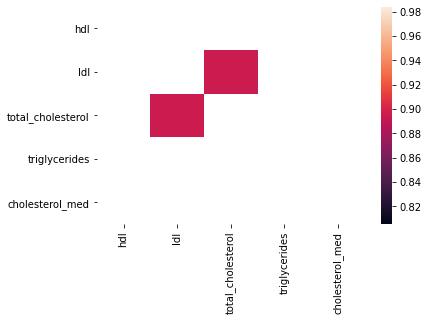

In [687]:
sns.heatmap(minidf1.corr()[(minidf1.corr() >= 0.5) & (minidf1.corr() < 1)])

<AxesSubplot:>

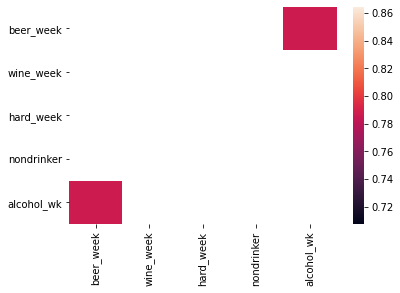

In [531]:
i = minidf5
sns.heatmap(i.corr()[(i.corr() >= 0.5) & (i.corr() < 1)])

<AxesSubplot:>

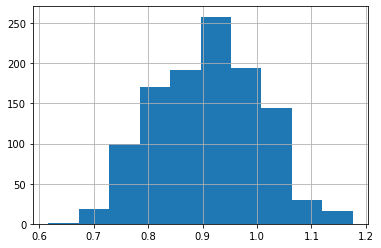

In [516]:
data_df.waisthip.hist()

In [696]:
DRvif = vifs[vifs.VIF>10].variables.to_list()
#DRvif

In [698]:
corvarrem = r'/Users/anand/code/pandit-a/corvarrem.csv'
corvarlist = pd.read_csv(corvarrem)
corvarlist = corvarlist.variables.to_list()

# Permutation importance

In [598]:
from sklearn.inspection import permutation_importance
ridge_reg = Ridge().fit(Xt1, yt) # Fit model
permutation_score = permutation_importance(ridge_reg, Xt1, yt, n_repeats=10) # Perform Permutation
importance_df = pd.DataFrame(np.vstack((Xt1.columns, permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False, inplace=True) # Order by importance
##importance_df.tail(40)

,feature,score_decrease
1,sex,0.000867
79,menopausal_status,0.000753
87,htn_med,0.000635
63,awake_freq,0.000485
0,wsc_vst,0.000463
86,dep_ssri_med,0.000459
58,anyinsomnia,0.000443
104,ptstl90,0.000436
43,alcohol_wk,0.000393
90,htn_arb_med,0.000361


In [593]:
from sklearn.inspection import permutation_importance
lin = LinearRegression().fit(Xt1, yt) # Fit model
permutation_score = permutation_importance(lin, Xt1, yt, n_repeats=10) # Perform Permutation
importance_df = pd.DataFrame(np.vstack((Xt1.columns, permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False, inplace=True) # Order by importance

In [613]:
lowimport = importance_df[(importance_df.score_decrease <= 0.001)  \
              & (importance_df.score_decrease >= -0.001)]
lowimport = lowimport.feature.to_list()

In [985]:
importance_df.head(60)

,feature,score_decrease
13,weightkg,1.198028
8,ldl,0.833124
11,uric_acid,0.320606
7,hdl,0.274473
47,packs_week,0.203144
23,sit_dia1,0.200837
25,sit_dia2,0.183402
48,cigars_day,0.180594
12,heightcm,0.107358
30,sitsysm,0.105682


In [953]:
highimp = importance_df.head(20).feature.to_list()

In [ ]:
data_df.w

In [711]:
data_df[['zung_index', 'zung_score']]

,zung_index,zung_score
wsc_id,,
10119,30.00,24.0
10191,38.75,31.0
10198,37.50,30.0
10226,42.50,34.0
10241,38.75,31.0
...,...,...
99481,27.50,22.0
99651,35.00,28.0
99761,41.25,33.0


In [714]:
Xt1.columns.to_list()

['sex',
 'age',
 'race',
 'education_survey1',
 'glucose',
 'hdl',
 'ldl',
 'triglycerides',
 'uric_acid',
 'heightcm',
 'weightkg',
 'headcm',
 'hipgirthm',
 'neckgirthm',
 'waistgirthm',
 'sitsysm',
 'sitdiam',
 'zung_index',
 'state',
 'trait',
 'cans_cola',
 'caffeine',
 'alcohol_wk',
 'smoke_years',
 'eval_general',
 'eval_life',
 'eval_health',
 'workday',
 'weekend',
 'naps',
 'anyinsomnia',
 'snore_freq',
 'snore_vol',
 'choke_freq',
 'awake_freq',
 'nasal_cong_none',
 'arrhythmia_ynd',
 'any_cvd',
 'hypertension_ynd',
 'diabetes_ynd',
 'asthma_ynd',
 'thyroid_ynd',
 'arthritis_ynd',
 'apnea',
 'ho_score',
 'menopausal_status',
 'asthma_med',
 'cholesterol_med',
 'decongestants_med',
 'antihistamines_med',
 'anxiety_med',
 'diabetes_med',
 'estrogen_med',
 'progesterone_med',
 'sedative_med',
 'thyroid_med',
 'minsao2tst',
 'x0_Unknown',
 'x0_C',
 'x0_N',
 'x0_P']

# Binning the target

<AxesSubplot:>

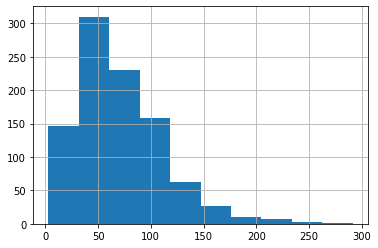

In [1016]:
ytrain.hist()

In [1112]:
q1 = ytrain.quantile(1)

In [1140]:
ytrainbin = pd.cut(ytrain, bins=[0,40,64,93,400], labels=[1,2,3,4])

In [1208]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
##, recall_score, precision_score, accuracy_score


In [1163]:
model = LogisticRegression(multi_class='ovr', max_iter = 1000)

In [1209]:
Xtrain_tr, Xtrain_te, ytrainbin_tr, ytrainbin_te = \
train_test_split(Xtrain, ytrainbin, test_size=0.33)

In [1210]:
model.fit(Xtrain_tr, ytrainbin_tr)
ypred = model.predict(Xtrain_te)
score1 = f1_score(ytrainbin_te, ypred, average='micro') 
score2 = recall_score(ytrainbin_te, ypred, average='micro')
score3 = precision_score(ytrainbin_te, ypred, average='micro')
score4 = accuracy_score(ytrainbin_te, ypred)
(score1, score2, score3, score4)

(0.40317460317460313,
 0.4031746031746032,
 0.4031746031746032,
 0.4031746031746032)

In [1217]:
ytrainbin_te

223    3
778    1
155    1
926    4
556    4
      ..
315    3
598    4
780    1
889    4
103    4
Name: waso, Length: 315, dtype: int64

In [1216]:
accuracy_score(ytrainbin_te, ypred) 

0.4031746031746032

In [1184]:
cv_results = cross_validate(model, Xtrain1, ytrain1bin, cv=5, scoring=['recall'])
sorted(cv_results.keys())

/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/anand/.pyenv/versions/3.8.6/envs/dreamteam/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

['fit_time', 'score_time', 'test_recall']

In [1186]:
cv_results['test_recall'].mean()

nan

In [1170]:
model.fit(Xtrain1, ytrain1bin)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [1173]:
ypred = model.predict(Xtrain1)

# Modelling

In [734]:
corvarrem = r'/Users/anand/code/pandit-a/corvarrem.csv'
corvarlist = pd.read_csv(corvarrem)
corvarlist = corvarlist.variables.to_list()

In [919]:
len(corvarlist)

60

<AxesSubplot:>

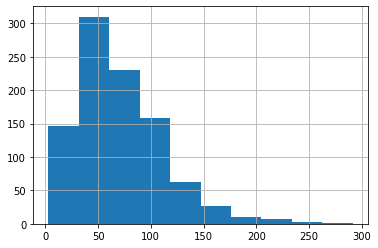

In [926]:
ytrain1.hist()

In [930]:
(ytrain1.mean(), ytrain1.median())

(70.28794549266249, 63.5)

In [1090]:
highimp = importance_df.head(38).feature.to_list()

In [1192]:
Xtrain = pd.DataFrame(Xt, columns = X_train.columns)
#Xtrain1.drop(columns = corvarlist, inplace=True)
Xtrain = Xtrain[highimp]
ytrain = y_train.reset_index(drop=True)

Xtest = prepipe.fit_transform(X_test)
Xtest = pd.DataFrame(Xtest2, columns = X_train.columns)
##Xtest2.drop(columns = corvarlist, inplace=True)
Xtest = Xtest[highimp]
ytest = y_test.reset_index(drop=True)

In [1092]:
model = Lasso(alpha=0.6)

In [1093]:
cv_results = cross_validate(model, Xtrain, ytrain, cv=5, scoring=('r2','neg_mean_absolute_error'))
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_neg_mean_absolute_error', 'test_r2']

In [1094]:
cv_results['test_neg_mean_absolute_error'].mean()

-28.505269767499993

In [1095]:
cv_results['test_r2'].mean()

0.16142872824644544

In [962]:
ytrain.mean(), ytrain.min(), ytrain.max()

(70.28794549266249, 3.0, 291.5)

In [914]:
model.fit(Xt1,yt1)

Lasso(alpha=0.6)

In [916]:
coefs = pd.DataFrame([Xt1.columns, model.coef_]).T

In [917]:
coefs.columns = ['variable', 'coef']

In [918]:
coefs.sort_values(by = 'coef')

,variable,coef
89,htn_alpha_med,-4.49772
62,apnea_freq,-3.975247
84,cholesterol_med,-2.16014
50,smoke_years,-1.661037
73,asthma_ynd,-1.404608
...,...,...
48,cigars_day,3.60936
18,hip_girth1,3.70811
44,smoke,5.789552
69,coronarybypass_ynd,6.767169


In [ ]:
y_baseline = pd.Series([np.mean(yt1)]*len(yt2))
print(f'Mean Absolute Error (Baseline Prediction):{mean_absolute_error(y_test, y_baseline)}')

In [923]:
Xt1.columns.to_list()

['sex',
 'age',
 'race',
 'education_survey1',
 'hdl',
 'ldl',
 'heightcm',
 'weightkg',
 'headcm',
 'hipgirthm',
 'waisthip',
 'sitsysm',
 'sitdiam',
 'zung_index',
 'state',
 'trait',
 'cans_cola',
 'caffeine',
 'alcohol_wk',
 'smoke_years',
 'eval_general',
 'eval_life',
 'eval_health',
 'workday',
 'weekend',
 'naps',
 'anyinsomnia',
 'snore_freq',
 'snore_vol',
 'choke_freq',
 'awake_freq',
 'nasal_cong_none',
 'arrhythmia_ynd',
 'any_cvd',
 'hypertension_ynd',
 'diabetes_ynd',
 'asthma_ynd',
 'thyroid_ynd',
 'arthritis_ynd',
 'apnea',
 'menopausal_status',
 'asthma_med',
 'cholesterol_med',
 'decongestants_med',
 'antihistamines_med',
 'anxiety_med',
 'diabetes_med',
 'estrogen_med',
 'progesterone_med',
 'sedative_med',
 'thyroid_med',
 'x0_C',
 'x0_N',
 'x0_P']

# Baseline

In [934]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

In [931]:
dummy = DummyRegressor(strategy='median')

In [963]:
dummy.fit(Xtrain1, ytrain1)

DummyRegressor(strategy='median')

In [964]:
dummy.score(Xtest2, ytest2)

-0.035286588270009966

In [965]:
mean_absolute_error(ytest2, dummy.predict(Xtest2))

33.16923076923077

In [946]:
Xtrain1.head()

,sex,age,race,education_survey1,hdl,ldl,heightcm,weightkg,headcm,hipgirthm,waisthip,sitsysm,sitdiam,zung_index,state,trait,cans_cola,caffeine,alcohol_wk,smoke_years,eval_general,eval_life,eval_health,workday,weekend,naps,anyinsomnia,snore_freq,snore_vol,choke_freq,awake_freq,nasal_cong_none,arrhythmia_ynd,any_cvd,hypertension_ynd,diabetes_ynd,asthma_ynd,thyroid_ynd,arthritis_ynd,apnea,menopausal_status,asthma_med,cholesterol_med,decongestants_med,antihistamines_med,anxiety_med,diabetes_med,estrogen_med,progesterone_med,sedative_med,thyroid_med,x0_C,x0_N,x0_P
0,0.133333,-0.555556,0.268835,0.305685,2.703704,2.418605,1.818182,1.818182,1.090909,0.555556,0.170213,0.214211,0.130636,0.0,0.000000,0.0,0.000000,-1.684211,0.0,-0.666667,-0.4,1.0,1.0,1.0,0.166667,0.250,0.375,0.0,0.714286,1.0,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.666667,2.944444,0.408370,1.040378,-0.203704,0.500000,0.727273,0.727273,-0.636364,-0.555556,0.255319,0.214211,0.130636,0.0,0.187277,0.0,4.519008,-0.842105,0.0,0.333333,-0.4,0.0,-1.0,0.0,-0.166667,-0.125,0.000,0.0,0.500000,1.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.066667,-0.055556,-0.777676,-1.082071,0.203704,-0.406977,-0.242424,-0.242424,0.363636,-0.222222,-0.255319,1.964472,-0.869364,0.0,0.000000,0.0,0.000000,-0.421053,0.0,0.333333,1.8,1.0,0.0,0.0,-0.166667,-0.125,0.000,0.0,-0.928571,1.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.933333,0.722222,-0.963723,-0.735132,1.425926,1.976744,2.545455,2.545455,-0.363636,0.444444,-0.595745,-0.785789,-0.869364,0.0,0.000000,0.0,0.000000,1.684211,0.0,-0.333333,-0.2,0.0,0.0,2.0,-0.166667,-0.125,0.000,0.0,-0.714286,1.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.666667,-0.055556,1.059533,0.897521,-0.244444,-0.325581,-0.454545,-0.424242,0.090909,-0.666667,-0.170213,0.214211,0.130636,0.0,0.187277,0.0,17.922314,0.842105,0.0,-0.333333,-0.4,0.0,0.0,0.0,1.000000,-0.125,1.000,0.0,0.928571,1.0,5.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1096]:
highimp

['weightkg',
 'ldl',
 'uric_acid',
 'hdl',
 'packs_week',
 'sit_dia1',
 'sit_dia2',
 'cigars_day',
 'heightcm',
 'sitsysm',
 'eval_general',
 'hip_girth2',
 'sit_sys2',
 'hip_girth1',
 'smoke',
 'triglycerides',
 'cups_coffee',
 'waist_girth2',
 'coronarybypass_ynd',
 'arthritis_ynd',
 'education_survey1',
 'waisthip',
 'x0_N',
 'htn_alpha_med',
 'sitdiam',
 'headcm',
 'neck_girth1',
 'state',
 'smoke_curr',
 'ho_score',
 'caffeine',
 'bmi',
 'cholesterol_med',
 'x0_C',
 'asthma_ynd',
 'zung_score',
 'apnea',
 'waist_girth1']